In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

--2023-05-22 23:55:48--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:9a00:b:20a5:b140:21, 2600:9000:21dd:a400:b:20a5:b140:21, 2600:9000:21dd:7400:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:9a00:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-01.parquet’

yellow_tripdata_202 100%[===================>]  36.37M  2.91MB/s    in 17s     

2023-05-22 23:56:05 (2.13 MB/s) - ‘yellow_tripdata_2022-01.parquet’ saved [38139949/38139949]



In [3]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

--2023-05-22 23:56:06--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:c00:b:20a5:b140:21, 2600:9000:21dd:a400:b:20a5:b140:21, 2600:9000:21dd:6400:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:c00:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45616512 (44M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-02.parquet’

yellow_tripdata_202 100%[===================>]  43.50M  2.29MB/s    in 25s     

2023-05-22 23:56:31 (1.71 MB/s) - ‘yellow_tripdata_2022-02.parquet’ saved [45616512/45616512]



In [16]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

--2023-05-23 00:05:46--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:a400:b:20a5:b140:21, 2600:9000:21dd:7800:b:20a5:b140:21, 2600:9000:21dd:1200:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:a400:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  2.74MB/s    in 21s     

2023-05-23 00:06:07 (2.17 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]



In [5]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 1.1 MB/s eta 0:00:0000:0100:01


In [4]:
df = pd.read_parquet('~/Documents/MLOps Zoomcamp/data/yellow_tripdata_2022-01.parquet')

In [5]:
df.shape

(2463931, 19)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [7]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 39)]


In [8]:
len(df)

2369101

In [9]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.369101e+06,2.304699e+06,2.369101e+06,2.304699e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.369101e+06,2.304699e+06,2.304699e+06,2.369101e+06
mean,1.698372e+00,1.388757e+00,5.113809e+00,1.245365e+00,1.664473e+02,1.641205e+02,1.189130e+00,1.188211e+01,1.009219e+00,4.943541e-01,2.280413e+00,2.950270e-01,2.974902e-01,1.794172e+01,2.315587e+00,6.766936e-02,1.192474e+01
std,4.590477e-01,9.840085e-01,5.564048e+02,4.603063e+00,6.554109e+01,7.050835e+01,4.865187e-01,2.607571e+02,1.216046e+00,6.963131e-02,2.473268e+00,1.458063e+00,3.860564e-02,2.608611e+02,6.888643e-01,2.843240e-01,7.499537e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.350000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-2.533000e+02,-2.500000e+00,-1.250000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.350000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,0.000000e+00,1.005000e+01
75%,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.300000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,1.930000e+01,2.500000e+00,0.000000e+00,1.561667e+01
max,5.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,3.300000e+00,8.888800e+02,8.700000e+01,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00,3.900000e+01


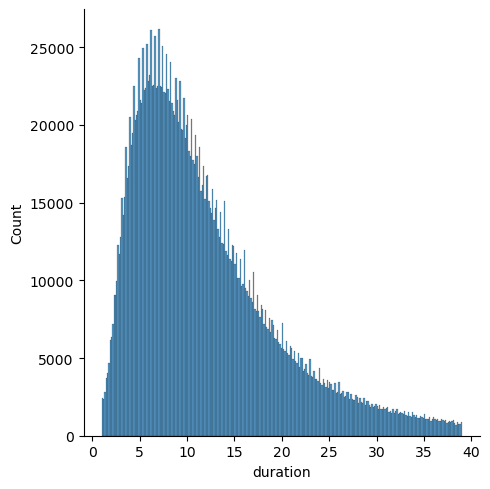

In [12]:
sns.displot(df.duration)

In [13]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    2.369101e+06
mean     1.192474e+01
std      7.499537e+00
min      1.000000e+00
50%      1.005000e+01
95%      2.766667e+01
98%      3.295000e+01
99%      3.553333e+01
max      3.900000e+01
Name: duration, dtype: float64

### Features


In [14]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical].dtypes
df[categorical] = df[categorical].astype(str)


In [15]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [16]:
train_dicts = df[categorical+numerical].to_dict(orient='records')

In [17]:
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [18]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train

<2369101x514 sparse matrix of type '<class 'numpy.float64'>'
	with 7107303 stored elements in Compressed Sparse Row format>

In [20]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [21]:
X_train.shape

(2369101, 514)

In [22]:
len(dv.get_feature_names_out())

514

In [23]:
target = 'duration'
# target
y_train = df[target].values

## Training

## Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_train)

/var/folders/fl/tyk3pbz53zbgy0w8f33qtz1c0000gn/T/ipykernel_93582/4107668193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/var/folders/fl/tyk3pbz53zbgy0w8f33qtz1c0000gn/T/ipykernel_93582/4107668193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, l

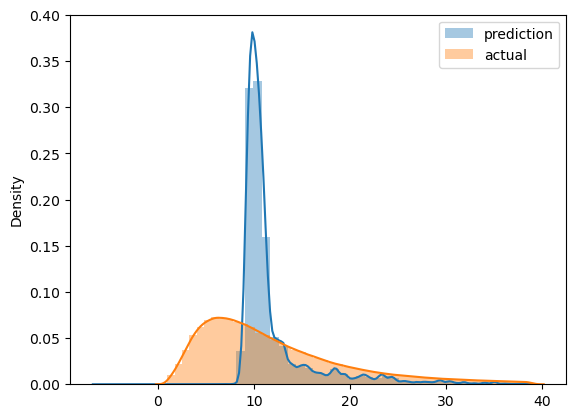

In [26]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

In [28]:
mean_squared_error(y_train, y_pred, squared=False)

6.209719287697505

In [29]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 39)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [30]:
df_train = read_dataframe('~/Documents/MLOps Zoomcamp/data/yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('~/Documents/MLOps Zoomcamp/data/yellow_tripdata_2022-02.parquet')

In [31]:
len(df_train), len(df_val)

(2369101, 2831735)

In [32]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [33]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [34]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

21.43904994732773

/var/folders/fl/tyk3pbz53zbgy0w8f33qtz1c0000gn/T/ipykernel_93582/4107668193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/var/folders/fl/tyk3pbz53zbgy0w8f33qtz1c0000gn/T/ipykernel_93582/4107668193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, l

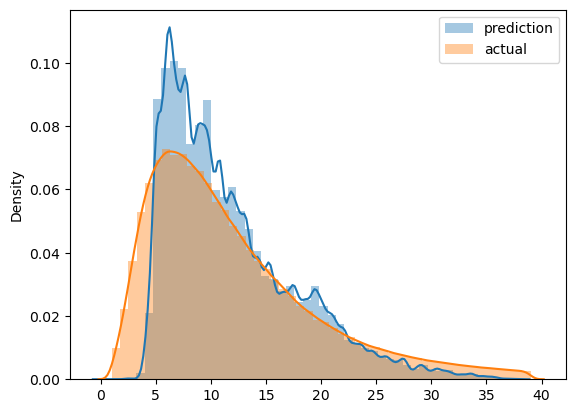

In [36]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()